In [51]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(state, pos_label=1):
    output_path = f"/home/linjw/GNNs/HGB/NC/benchmark/methods/baseline/output/save/ERM_{state}.txt"
    label_path = f'/home/linjw/GNNs/HGB/NC/benchmark/methods/baseline/output/save/label_{state}.dat.test'
    
    # Read data
    output = pd.read_table(output_path, header=None)
    label = pd.read_table(label_path, header=None)

    # Sort label
    label = label.sort_values(0)

    # Rename columns and select needed columns
    output.columns = ['Idx', 'Ept', 'GroundTruth', 'Predict']
    output['GroundTruth'] = label[3].values
    output = output[['GroundTruth', 'Predict']]

    # Calculate metrics
    precision = precision_score(output['GroundTruth'], output['Predict'], pos_label=pos_label)
    recall = recall_score(output['GroundTruth'], output['Predict'], pos_label=pos_label)
    f1 = f1_score(output['GroundTruth'], output['Predict'], pos_label=pos_label)

    return {'State': state, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Create a list to store the results
results_list = []

# Iterate through states and calculate metrics
for state in range(3):
    metrics_dict = calculate_metrics(state, pos_label=1)
    results_list.append(metrics_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)[['Precision','Recall','F1 Score']]

results_df

# Melt the DataFrame
melted_df = pd.melt(results_df, var_name='Metric', value_name='Value')
melted_df

/home/linjw/anaconda3/envs/biobase/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/linjw/anaconda3/envs/biobase/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Metric,Value
0,Precision,0.000000
1,Precision,0.000000
2,Precision,0.981132
3,Recall,0.000000
4,Recall,0.000000
5,Recall,0.852459
6,F1 Score,0.000000
7,F1 Score,0.000000
8,F1 Score,0.912281


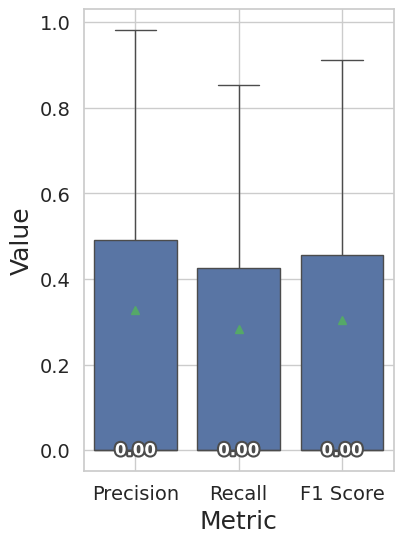

In [53]:
import matplotlib.patheffects as path_effects
def add_median_labels(ax, fmt=".2f") -> None:
    """Add a text label to the median line of a seaborn boxplot.

    Args:
        ax: matplotlib.axes, e.g. the return value of sns.boxplot()
        fmt: format string for the median value
    """
    global gg
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if "Patch" in str(c)]
    lines_per_box = len(lines) // len(boxes)
    for median in lines[4::lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        gg = median
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])
plt.figure(figsize=(4, 6))
ax = sns.boxplot(data=melted_df, x='Metric', y='Value', showmeans=True)
add_median_labels(ax)
plt.xlabel("Metric", fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Value", fontsize=18)
# plt.title("Value Comparison by Metric", fontsize=18)
# plt.ylim(0.5,1.0)
# plt.legend(bbox_to_anchor=(0.8, -0.09), ncol=5, fontsize=14)
plt.grid(True)
plt.savefig("1.png")
plt.show()

In [48]:
import numpy as np
points = np.linspace(1, 50, 50)
points

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

#### 统计训统计

In [59]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(state, pos_label=1):
    output_path = f"/home/linjw/GNNs/HGB/NC/benchmark/methods/baseline/output/save/ERM_{state}.txt"
    label_path = f'/home/linjw/GNNs/HGB/NC/benchmark/methods/baseline/output/save/label_{state}.dat.test'
    
    # Read data
    output = pd.read_table(output_path, header=None)
    label = pd.read_table(label_path, header=None)

    # Sort label
    label = label.sort_values(0)

    # Rename columns and select needed columns
    output.columns = ['Idx', 'Ept', 'GroundTruth', 'Predict']
    output['GroundTruth'] = label[3].values
    output = output[['GroundTruth', 'Predict']]

    # Calculate metrics
    precision = precision_score(output['GroundTruth'], output['Predict'], pos_label=pos_label)
    recall = recall_score(output['GroundTruth'], output['Predict'], pos_label=pos_label)
    f1 = f1_score(output['GroundTruth'], output['Predict'], pos_label=pos_label)

    return {'State': state, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Create a list to store the results
results_list = []

# Iterate through states and calculate metrics
for state in range(50):
    metrics_dict = calculate_metrics(state, pos_label=1)
    results_list.append(metrics_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)[['Precision','Recall','F1 Score']]

results_df

/home/linjw/anaconda3/envs/biobase/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/linjw/anaconda3/envs/biobase/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Precision,Recall,F1 Score
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.981132,0.852459,0.912281
3,0.982143,0.763889,0.859375
4,0.949153,0.888889,0.918033
5,0.896104,0.932432,0.913907
6,0.968254,0.884058,0.924242
7,0.920635,0.920635,0.920635
8,0.966102,0.934426,0.950000
9,0.971831,0.945205,0.958333


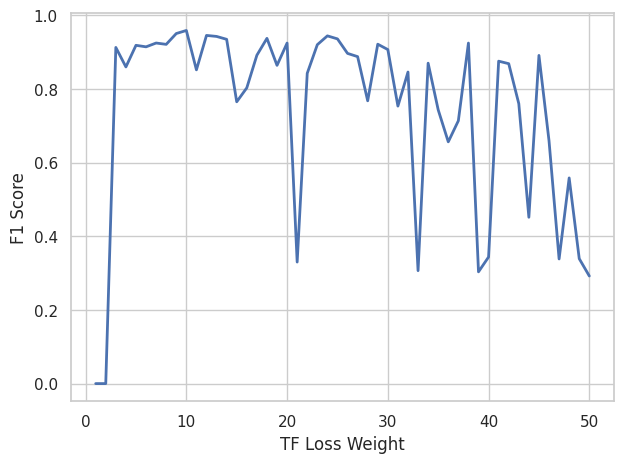

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# 生成一些示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 创建图表和坐标轴
fig, ax = plt.subplots()

# 绘制折线图
ax.plot(range(1,51), results_df['F1 Score'].values, linestyle='-', color='b', linewidth=2)
ax.set_xlabel('TF Loss Weight')
ax.set_ylabel('F1 Score')

# 显示图例
# 设置网格线
ax.grid(True)

# 调整布局
plt.tight_layout()
# 显示图表
plt.show()
